In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

In [305]:
ca_revenue_raw = os.path.join('Resources', 'CA_Historical_Revenues.csv')

In [306]:
ca_pd_raw = pd.read_csv(ca_revenue_raw)

In [307]:
#initial cleaning
df = ca_pd_raw.drop(columns=["Unnamed: 0","Unnamed: 7", "Unnamed: 8"])

In [308]:
total_rev_ca = df
#alcohol taxes CA
alcohol_ca = df[df['Source']=='Alcoholic Beverages Taxes & Fees']
alcohol_ca = alcohol_ca.drop(columns='Source')
#tobacco taxes CA
tobacco_ca = df[df['Source']=='Cigarette Tax']
tobacco_ca = tobacco_ca.drop(columns='Source')
#sales and use taxes CA
sales_use_ca = df[df['Source']=='Retail Sales and Use Tax']
sales_use_ca = sales_use_ca.drop(columns='Source')

In [309]:
#cleaning unneeded columns
total_rev_ca = total_rev_ca.drop(columns='Code')
total_rev_ca = total_rev_ca.drop(columns='Category')
alcohol_ca = alcohol_ca.drop(columns='Code')
alcohol_ca = alcohol_ca.drop(columns='Category')
tobacco_ca = tobacco_ca.drop(columns='Code')
tobacco_ca = tobacco_ca.drop(columns='Category')
sales_use_ca = sales_use_ca.drop(columns='Code')
sales_use_ca = sales_use_ca.drop(columns='Category')

In [310]:
#removing delimiters from the data
total_rev_ca[['Fiscal Year','Trash0']] = total_rev_ca['Fiscal Year'].str.split('-',expand=True)
total_rev_ca['Amount'] = total_rev_ca['Amount'].str.replace(',', '')
alcohol_ca[['Fiscal Year','Trash0']] = alcohol_ca['Fiscal Year'].str.split('-',expand=True)
alcohol_ca['Amount'] = alcohol_ca['Amount'].str.replace(',', '')
tobacco_ca[['Fiscal Year','Trash0']] = tobacco_ca['Fiscal Year'].str.split('-',expand=True)
tobacco_ca['Amount'] = tobacco_ca['Amount'].str.replace(',', '')
sales_use_ca[['Fiscal Year','Trash0']] = sales_use_ca['Fiscal Year'].str.split('-',expand=True)
sales_use_ca['Amount'] = sales_use_ca['Amount'].str.replace(',', '')

In [311]:
#trashing
total_rev_ca = total_rev_ca.drop(columns='Trash0')
alcohol_ca = alcohol_ca.drop(columns='Trash0')
tobacco_ca = tobacco_ca.drop(columns='Trash0')
sales_use_ca = sales_use_ca.drop(columns='Trash0')

In [312]:
#turning data numeric
total_rev_ca['Fiscal Year'] = pd.to_numeric(total_rev_ca['Fiscal Year'], errors='raise')
total_rev_ca['Amount'] = pd.to_numeric(total_rev_ca['Amount'], errors='raise')
alcohol_ca['Fiscal Year'] = pd.to_numeric(alcohol_ca['Fiscal Year'], errors='raise')
alcohol_ca['Amount'] = pd.to_numeric(alcohol_ca['Amount'], errors='raise')
tobacco_ca['Fiscal Year'] = pd.to_numeric(tobacco_ca['Fiscal Year'], errors='raise')
tobacco_ca['Amount'] = pd.to_numeric(tobacco_ca['Amount'], errors='raise')
sales_use_ca['Fiscal Year'] = pd.to_numeric(sales_use_ca['Fiscal Year'], errors='raise')
sales_use_ca['Amount'] = pd.to_numeric(sales_use_ca['Amount'], errors='raise')

In [313]:
#restricting fiscal years to >= 2013
total_rev_ca = total_rev_ca.loc[total_rev_ca['Fiscal Year'] >= 2013,['Type of Fund','Fiscal Year','Amount']]
alcohol_ca = alcohol_ca.loc[alcohol_ca['Fiscal Year'] >= 2013,['Type of Fund','Fiscal Year','Amount']]
tobacco_ca = tobacco_ca.loc[tobacco_ca['Fiscal Year'] >= 2013,['Type of Fund','Fiscal Year','Amount']]
sales_use_ca = sales_use_ca.loc[sales_use_ca['Fiscal Year'] >= 2013,['Type of Fund','Fiscal Year','Amount']]

In [314]:
#adds sum of years between special and general funds
trv_yr_sum = total_rev_ca.groupby(by='Fiscal Year')
alc_yr_sum = alcohol_ca.groupby(by='Fiscal Year')
tbc_yr_sum = tobacco_ca.groupby(by='Fiscal Year')
sls_yr_sum = sales_use_ca.groupby(by='Fiscal Year')
total_rev_ca = trv_yr_sum.sum()
alcohol_ca = alc_yr_sum.sum()
tobacco_ca = tbc_yr_sum.sum()
sales_use_ca = sls_yr_sum.sum()

In [315]:
ca_df=pd.DataFrame({
    "State":("California"),
    "Year": [2013,2014,2015,2016,2017],
    "Total Revenue":total_rev_ca['Amount'],
    "Total Sales Tax":sales_use_ca['Amount'],
    "Total Tobacco Sales Tax":tobacco_ca['Amount'],
    "Total Alcohol Sales Tax":alcohol_ca['Amount'],
    "Total Marijuana Sales Tax": [0,0,0,0,0]
}
)

In [316]:
# Add percentage columns
ca_df["Tobacco's Share of Total Sales Tax %"]=ca_df["Total Tobacco Sales Tax"] * 100 / \
ca_df["Total Sales Tax"]
ca_df["Alcohol's Share of Total Sales Tax %"]= ca_df["Total Alcohol Sales Tax"] * 100 / \
ca_df["Total Sales Tax"]
ca_df["Marijuana's Share of Total Sales Tax %"]=[0,0,0,0,0]

In [317]:
ca_df.to_csv('CA_DataFrame.csv')

In [318]:
df=ca_df

In [319]:
df['Other Sales/Use %']=100-(df["Tobacco's Share of Total Sales Tax %"]+df["Alcohol's Share of Total Sales Tax %"]+df["Alcohol's Share of Total Sales Tax %"])

In [320]:
#breaking data down by year for plotting
taxes013 = df.loc[df['Year'] == 2013,["Other Sales/Use %","Tobacco's Share of Total Sales Tax %","Alcohol's Share of Total Sales Tax %","Marijuana's Share of Total Sales Tax %"]]
taxes014 = df.loc[df['Year'] == 2014,["Other Sales/Use %","Tobacco's Share of Total Sales Tax %","Alcohol's Share of Total Sales Tax %","Marijuana's Share of Total Sales Tax %"]]
taxes015 = df.loc[df['Year'] == 2015,["Other Sales/Use %","Tobacco's Share of Total Sales Tax %","Alcohol's Share of Total Sales Tax %","Marijuana's Share of Total Sales Tax %"]]
taxes016 = df.loc[df['Year'] == 2016,["Other Sales/Use %","Tobacco's Share of Total Sales Tax %","Alcohol's Share of Total Sales Tax %","Marijuana's Share of Total Sales Tax %"]]
taxes017 = df.loc[df['Year'] == 2017,["Other Sales/Use %","Tobacco's Share of Total Sales Tax %","Alcohol's Share of Total Sales Tax %","Marijuana's Share of Total Sales Tax %"]]

In [321]:
#flip the data per year for plotting
tax13 = pd.melt(taxes013)
tax14 = pd.melt(taxes014)
tax15 = pd.melt(taxes015)
tax16 = pd.melt(taxes016)
tax17 = pd.melt(taxes017)

In [322]:
#assign the value
taxes13=tax13['value']
taxes14=tax14['value']
taxes15=tax15['value']
taxes16=tax16['value']
taxes17=tax17['value']

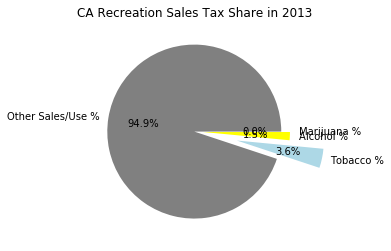

In [323]:
labels=["Other Sales/Use %","Tobacco %", "Alcohol %", "Marijuana %"]
colors=["gray","lightblue","yellow","green"]
explode=[0,.5,.1,.1]
plt.axis("equal")
plt.title(f"CA Recreation Sales Tax Share in 2013")
plt.pie(taxes13,colors=colors,labels=labels, explode=explode, autopct="%1.1f%%")
plt.savefig('CA2013_Rec_Sales_Tax_Share_Pie.png')
plt.show()

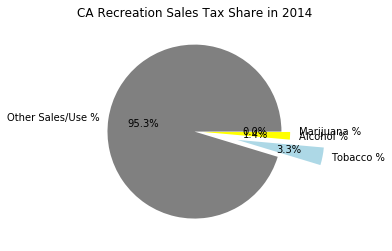

In [324]:
labels=["Other Sales/Use %","Tobacco %", "Alcohol %", "Marijuana %"]
colors=["gray","lightblue","yellow","green"]
explode=[0,.5,.1,.1]
plt.axis("equal")
plt.title(f"CA Recreation Sales Tax Share in 2014")
plt.pie(taxes14,colors=colors,labels=labels, explode=explode, autopct="%1.1f%%")
plt.savefig('CA2014_Rec_Sales_Tax_Share_Pie.png')
plt.show()

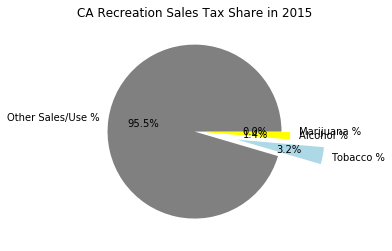

In [325]:
labels=["Other Sales/Use %","Tobacco %", "Alcohol %", "Marijuana %"]
colors=["gray","lightblue","yellow","green"]
explode=[0,.5,.1,.1]
plt.axis("equal")
plt.title(f"CA Recreation Sales Tax Share in 2015")
plt.pie(taxes15,colors=colors,labels=labels, explode=explode, autopct="%1.1f%%")
plt.savefig('CA2015_Rec_Sales_Tax_Share_Pie.png')
plt.show()

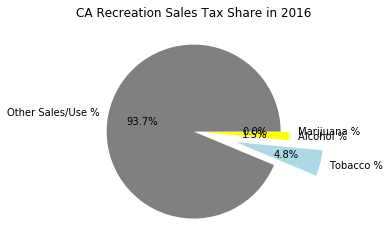

In [326]:
labels=["Other Sales/Use %","Tobacco %", "Alcohol %", "Marijuana %"]
colors=["gray","lightblue","yellow","green"]
explode=[0,.5,.1,.1]
plt.axis("equal")
plt.title(f"CA Recreation Sales Tax Share in 2016")
plt.pie(taxes16,colors=colors,labels=labels, explode=explode, autopct="%1.1f%%")
plt.savefig('CA2016_Rec_Sales_Tax_Share_Pie.png')
plt.show()

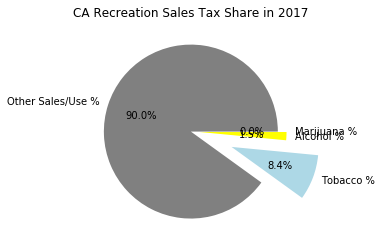

In [327]:
labels=["Other Sales/Use %","Tobacco %", "Alcohol %", "Marijuana %"]
colors=["gray","lightblue","yellow","green"]
explode=[0,.5,.1,.1]
plt.axis("equal")
plt.title(f"CA Recreation Sales Tax Share in 2017")
plt.pie(taxes17,colors=colors,labels=labels, explode=explode, autopct="%1.1f%%")
plt.savefig('CA2017_Rec_Sales_Tax_Share_Pie.png')
plt.show()